In [ ]:
pip install matplotlib

In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd

# Download historical stock data for Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2025-01-01')

# Save data to CSV
csv_filename = 'apple_stock_data_combined_years.csv'
data.to_csv(csv_filename)



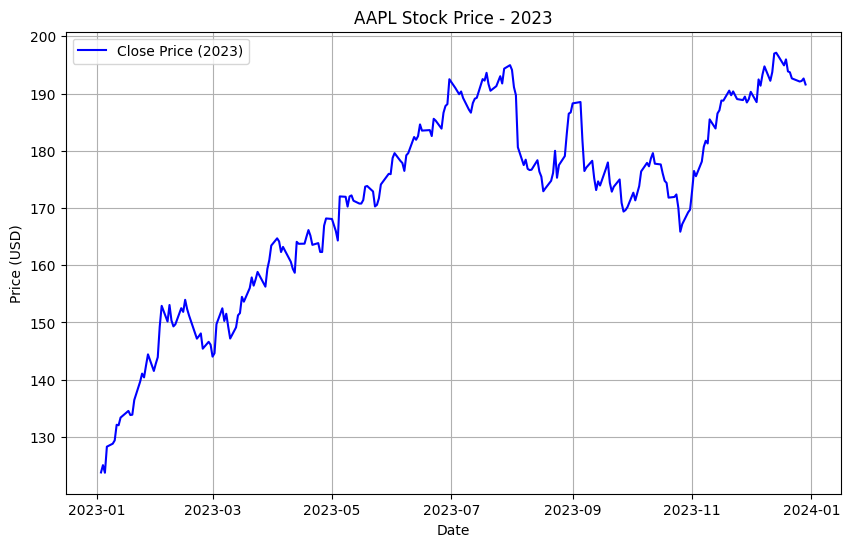

In [10]:
import matplotlib.pyplot as plt

# Filter data for 2023
data_2023 = data.loc['2023-01-01':'2023-12-31']

# Plot closing prices for 2023
plt.figure(figsize=(10, 6))
plt.plot(data_2023.index, data_2023['Close'], label='Close Price (2023)', color='blue')

# Formatting
plt.title('AAPL Stock Price - 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


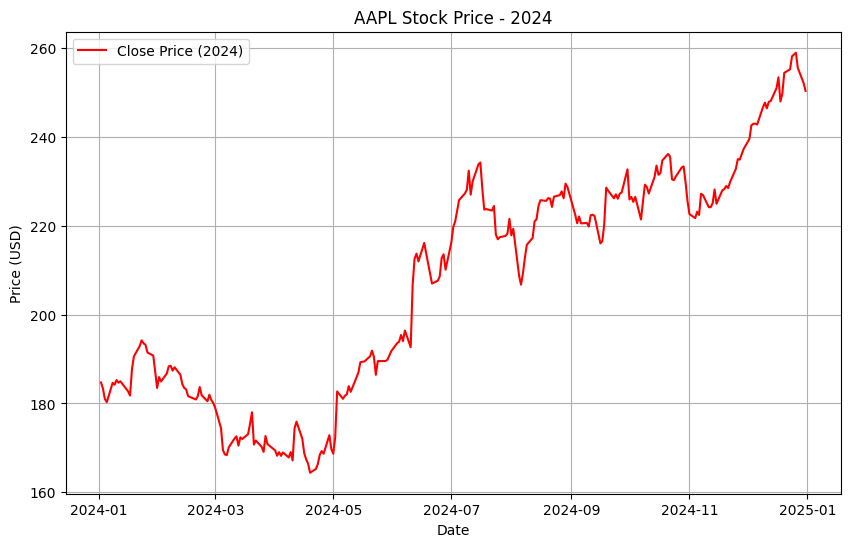

In [11]:
# Filter data for 2024
data_2024 = data.loc['2024-01-01':'2024-12-31']

# Plot closing prices for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['Close'], label='Close Price (2024)', color='red')

# Formatting
plt.title('AAPL Stock Price - 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


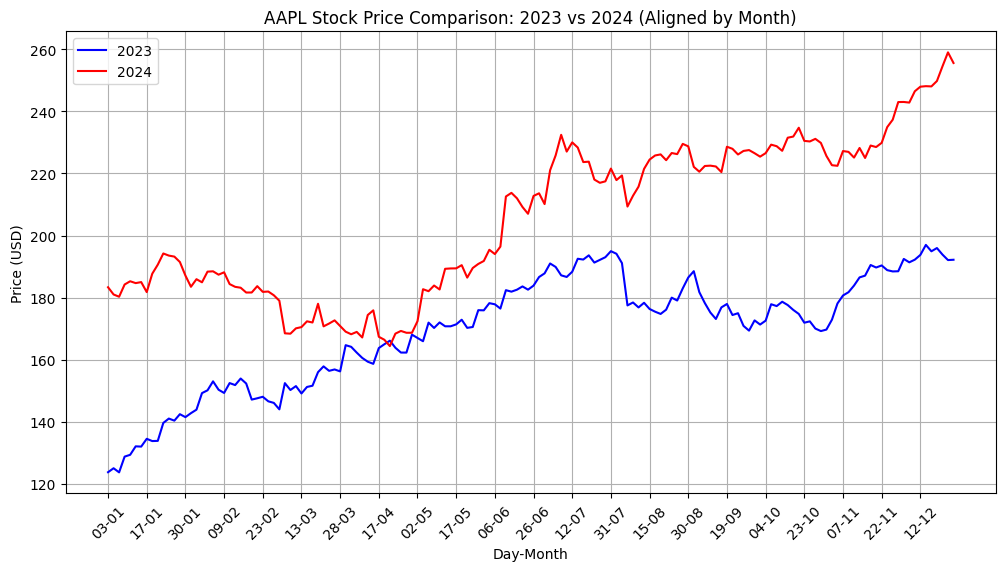

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index to extract only day-month format for alignment
data_2023 = data.loc['2023-01-01':'2023-12-31'].copy()
data_2024 = data.loc['2024-01-01':'2024-12-31'].copy()

# Create a new column for "Day-Month" (ignoring the year) so they align
data_2023['Day-Month'] = data_2023.index.strftime('%d-%m')
data_2024['Day-Month'] = data_2024.index.strftime('%d-%m')

# Merge both datasets based on "Day-Month"
comparison_df = pd.merge(data_2023[['Close', 'Day-Month']], 
                         data_2024[['Close', 'Day-Month']], 
                         on='Day-Month', 
                         suffixes=('_2023', '_2024'))

# Plot comparison of 2023 and 2024 with properly aligned months
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Day-Month'], comparison_df['Close_2023'], label='2023', color='blue')
plt.plot(comparison_df['Day-Month'], comparison_df['Close_2024'], label='2024', color='red')

# Formatting
plt.title('AAPL Stock Price Comparison: 2023 vs 2024 (Aligned by Month)')
plt.xlabel('Day-Month')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Adjust x-axis: Show only the first day of each month
month_ticks = [comparison_df['Day-Month'][i] for i in range(0, len(comparison_df), 7)]  # Select ~1 label per month
plt.xticks(month_ticks, rotation=45)  # Rotate labels for readability

plt.show()


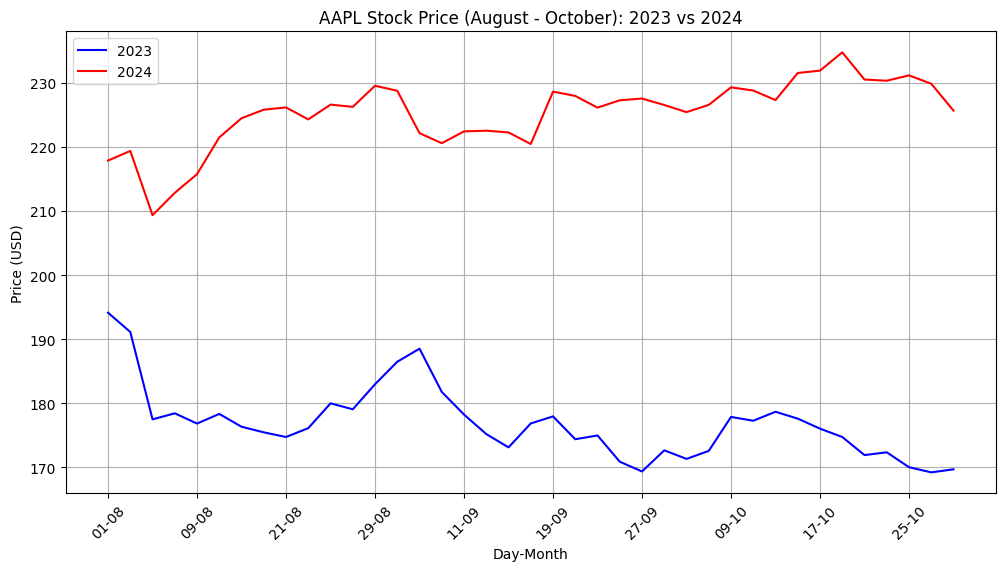

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for August, September, and October
data_2023_q3 = data_2023[data_2023['Day-Month'].str.match(r'^(0[1-9]|[12][0-9]|3[01])-(08|09|10)$')].copy()
data_2024_q3 = data_2024[data_2024['Day-Month'].str.match(r'^(0[1-9]|[12][0-9]|3[01])-(08|09|10)$')].copy()

# Merge both datasets based on "Day-Month"
comparison_q3 = pd.merge(data_2023_q3[['Close', 'Day-Month']], 
                         data_2024_q3[['Close', 'Day-Month']], 
                         on='Day-Month', 
                         suffixes=('_2023', '_2024'))

# Plot comparison of 2023 and 2024 for August-October
plt.figure(figsize=(12, 6))
plt.plot(comparison_q3['Day-Month'], comparison_q3['Close_2023'], label='2023', color='blue')
plt.plot(comparison_q3['Day-Month'], comparison_q3['Close_2024'], label='2024', color='red')

# Formatting
plt.title('AAPL Stock Price (August - October): 2023 vs 2024')
plt.xlabel('Day-Month')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Adjust x-axis: Show a readable selection of labels
month_ticks = [comparison_q3['Day-Month'][i] for i in range(0, len(comparison_q3), 4)]  # Show ~one label per week
plt.xticks(month_ticks, rotation=45)  # Rotate labels for readability

plt.show()


In [9]:
# WEB SCRAPING - ORGANIZAR DEPOIS
# WEB SCRAPING PARA OBTER DATAS DE LANÇAMENTO DOS IPHONES
# TRADUZIR PARA INGLES DEPOIS DE REVISAR

import requests
from bs4 import BeautifulSoup
import csv

# URL da página Wikipedia com informações sobre iPhones
url = 'https://en.wikipedia.org/wiki/IPhone'

# Faz uma requisição GET para a página
response = requests.get(url)

# Analisa o conteúdo da página com BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontre a seção correta. Suponha que estamos buscando uma tabela específica pela classe ou outro identificador
table = soup.find('table', {'class': 'wikitable'})

# Lista para armazenar dados
iphone_data = []

# Iterar sobre as linhas da tabela
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 1:  # Certifique-se de que há mais de uma célula
        try:
            # Verifique se a célula contém datas e ajuste conforme necessário
            # Exemplo: as células podem ter ordem diferente dependendo da tabela
            product_date = cells[0].get_text(strip=True)
            product_name = cells[1].get_text(strip=True)
            # Verifica se é possível converter a data antes de adicionar
            if "iPhone" in product_name:
                iphone_data.append([product_name, product_date])
        except IndexError:
            continue

# Defina o nome do arquivo CSV que você quer criar
csv_file_name = 'iphone_launch_datas.csv'

# Salve os dados no arquivo CSV
with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Product Name', 'Launch Date'])  # Cabeçalhos do CSV
    writer.writerows(iphone_data)

print(f'Dados salvos no arquivo {csv_file_name}')

Dados salvos no arquivo iphone_launch_datas.csv
